In [41]:
import networkx as nx
import numpy as np
from pprint import pprint
from tqdm import tqdm
import random
import copy
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import pickle as pk
import os
import json
import seaborn as sns
import operator as op
from sklearn.compose import make_column_selector 

In [42]:
edge_list = [(2,1), (3,2), (4,2), (5,2), (6,3), (7,3), (8,4), (9,4), (10,4), (11,5)]
G = nx.DiGraph(edge_list)

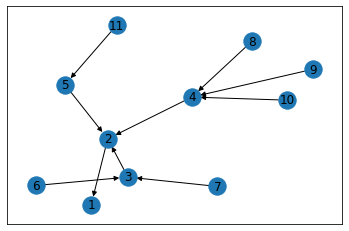

In [47]:
nx.draw_networkx(G, pos=nx.spring_layout(G) , with_labels=True)

In [4]:
# G.nodes[1]['incivility'] = 0 
# G.nodes[2]['incivility'] = 0
# G.nodes[3]['incivility'] = 1 
# G.nodes[4]['incivility'] = 0 
# G.nodes[5]['incivility'] = 1 
# G.nodes[6]['incivility'] = 1 
# G.nodes[7]['incivility'] = 0 
# G.nodes[8]['incivility'] = 1 
# G.nodes[9]['incivility'] = 1 
# G.nodes[10]['incivility'] = 0 
# G.nodes[11]['incivility'] = 1 

In [5]:
# G.nodes[1]['intolerance'] = 0
# G.nodes[2]['intolerance'] = 1
# G.nodes[3]['intolerance'] = 0 
# G.nodes[4]['intolerance'] = 1 
# G.nodes[5]['intolerance'] = 1 
# G.nodes[6]['intolerance'] = 0 
# G.nodes[7]['intolerance'] = 1 
# G.nodes[8]['intolerance'] = 1 
# G.nodes[9]['intolerance'] = 0 
# G.nodes[10]['intolerance'] = 0 
# G.nodes[11]['intolerance'] = 1 

In [6]:
annotated_tweets_dict = {"incivility":{}, "intolerance":{}}

annotated_tweets_dict['incivility'][1] = 0 
annotated_tweets_dict['incivility'][2] = 0
annotated_tweets_dict['incivility'][3] = 1 
annotated_tweets_dict['incivility'][4] = 0 
annotated_tweets_dict['incivility'][5] = 1 
annotated_tweets_dict['incivility'][6] = 1 
annotated_tweets_dict['incivility'][7] = 0 
annotated_tweets_dict['incivility'][8] = 1 
annotated_tweets_dict['incivility'][9] = 1 
annotated_tweets_dict['incivility'][10] = 0 
annotated_tweets_dict['incivility'][11] = 1 

annotated_tweets_dict['intolerance'][1] = 0
annotated_tweets_dict['intolerance'][2] = 1
annotated_tweets_dict['intolerance'][3] = 0 
annotated_tweets_dict['intolerance'][4] = 1 
annotated_tweets_dict['intolerance'][5] = 1 
annotated_tweets_dict['intolerance'][6] = 0 
annotated_tweets_dict['intolerance'][7] = 1 
annotated_tweets_dict['intolerance'][8] = 1 
annotated_tweets_dict['intolerance'][9] = 0 
annotated_tweets_dict['intolerance'][10] = 0 
annotated_tweets_dict['intolerance'][11] = 1 



In [48]:
nodes_dict = {}
nodes_neighbour_label = {}
distinct_labels = set()
dyadic_analysis_inc_int = {}

for node in G.nodes:
    inc_lbl = "inc" if annotated_tweets_dict['incivility'][node] == 1 else "civ"
    int_lbl = "int" if annotated_tweets_dict['intolerance'][node] == 1 else "tol"
    node_lbl = inc_lbl + " and " + int_lbl
    
    print("--------------------------------------------")
    print(f"The node id is {node} with label {node_lbl}")
    
    distinct_labels.add(node_lbl)
    node_in_degree = G.in_degree(node) if G.in_degree(node) != 0 else 1
    nodes_dict[node_lbl] = nodes_dict.get(node_lbl, 0) + node_in_degree
    
    if G.in_degree(node) == 0:
        nodes_neighbour_label[node_lbl] = nodes_neighbour_label.get(node_lbl, []) + ["X"]
    else:
        for edge in G.in_edges(node):
            
            print(f"node:{node}, edge:{edge}, the neighbour node: {edge[0]}")
            
            inc_lbl_neigh = "inc" if annotated_tweets_dict['incivility'][edge[0]] == 1 else "civ"
            int_lbl_neigh = "int" if annotated_tweets_dict['intolerance'][edge[0]] == 1 else "tol"
            node_lbl_neigh = inc_lbl_neigh + " and " + int_lbl_neigh
            
            print(f"the neighbour label is {node_lbl_neigh}")
            
            nodes_neighbour_label[node_lbl] = nodes_neighbour_label.get(node_lbl, []) + [node_lbl_neigh]
            
            
givens = list(distinct_labels)
probs = list(distinct_labels) + ["X"]
for condition1 in givens:
    for condition2 in probs:
        dyadic_analysis_inc_int[condition2+"|"+condition1] = sum([1 for i in nodes_neighbour_label[condition1] if i == condition2]) / nodes_dict[condition1]

--------------------------------------------
The node id is 2 with label civ and int
node:2, edge:(3, 2), the neighbour node: 3
the neighbour label is inc and tol
node:2, edge:(4, 2), the neighbour node: 4
the neighbour label is civ and int
node:2, edge:(5, 2), the neighbour node: 5
the neighbour label is inc and int
--------------------------------------------
The node id is 1 with label civ and tol
node:1, edge:(2, 1), the neighbour node: 2
the neighbour label is civ and int
--------------------------------------------
The node id is 3 with label inc and tol
node:3, edge:(6, 3), the neighbour node: 6
the neighbour label is inc and tol
node:3, edge:(7, 3), the neighbour node: 7
the neighbour label is civ and int
--------------------------------------------
The node id is 4 with label civ and int
node:4, edge:(8, 4), the neighbour node: 8
the neighbour label is inc and int
node:4, edge:(9, 4), the neighbour node: 9
the neighbour label is inc and tol
node:4, edge:(10, 4), the neighbour 

In [49]:
nodes_dict

{'civ and int': 7, 'civ and tol': 2, 'inc and tol': 4, 'inc and int': 3}

In [50]:
nodes_neighbour_label

{'civ and int': ['inc and tol',
  'civ and int',
  'inc and int',
  'inc and int',
  'inc and tol',
  'civ and tol',
  'X'],
 'civ and tol': ['civ and int', 'X'],
 'inc and tol': ['inc and tol', 'civ and int', 'X', 'X'],
 'inc and int': ['inc and int', 'X', 'X']}

In [33]:
distinct_labels

{'civ and int', 'civ and tol', 'inc and int', 'inc and tol'}

In [34]:
nodes_dict

{'civ and int': 7, 'civ and tol': 2, 'inc and tol': 4, 'inc and int': 3}

In [35]:
nodes_neighbour_label

{'civ and int': ['inc and tol',
  'civ and int',
  'inc and int',
  'inc and int',
  'inc and tol',
  'civ and tol',
  'X'],
 'civ and tol': ['civ and int', 'X'],
 'inc and tol': ['inc and tol', 'civ and int', 'X', 'X'],
 'inc and int': ['inc and int', 'X', 'X']}

In [36]:
dyadic_analysis_inc_int_df = pd.DataFrame.from_dict(data=dyadic_analysis_inc_int, orient='index')
dyadic_analysis_inc_int_df = dyadic_analysis_inc_int_df.rename(columns={0:"Likelihood"})

In [37]:
cols, inds = set(), set()
for item in list(dyadic_analysis_inc_int_df.index):
    items = item.split("|")
    inds.add(items[0])
    cols.add(items[1])

In [38]:
dyadic_analysis_inc_int_df_heatmap = pd.DataFrame(columns=cols, index=inds, dtype="float")

for likelihood in dyadic_analysis_inc_int:
    indeces = likelihood.split("|")
    dyadic_analysis_inc_int_df_heatmap.loc[indeces[0]][indeces[1]] = dyadic_analysis_inc_int[likelihood]

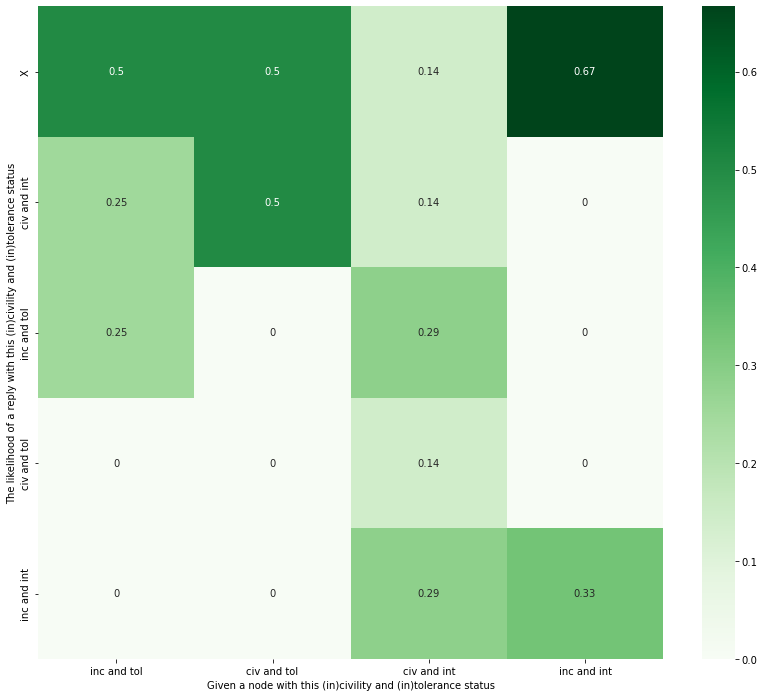

In [39]:
fig, ax = plt.subplots(figsize=(14,12)) 
ax = sns.heatmap(dyadic_analysis_inc_int_df_heatmap, annot=True, cmap="Greens")
ax.invert_yaxis()
plt.xlabel("Given a node with this (in)civility and (in)tolerance status")
plt.ylabel("The likelihood of a reply with this (in)civility and (in)tolerance status")
# ax.set_title("The likelihood of a reply with label Li to a node with label Lj (P(Li|Lj))")
# plt.savefig("./figures/"+subject+"_dyadic_interactions_hyper_network_heatmap.pdf", bbox_inches='tight')
# plt.savefig("./../"+output_path+"/figures/"+"_dyadic_inc_int_heatmap.png", bbox_inches="tight")
plt.show()